In [432]:
def check_columns(DataFrame, reports=False, graphs=False, dates=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """

    dataframeinfo = []

    # Check information about the index
    index_dtype = DataFrame.index.dtype
    index_unique_vals = DataFrame.index.unique()
    index_num_unique = DataFrame.index.nunique()
    index_num_null = DataFrame.index.isna().sum()
    index_pct_null = index_num_null / len(DataFrame.index)

    if pd.api.types.is_numeric_dtype(index_dtype) and not isinstance(
        DataFrame.index, pd.RangeIndex
    ):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (index_min_val, index_max_val)
    elif pd.api.types.is_datetime64_any_dtype(index_dtype):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (
            index_min_val.strftime("%Y-%m-%d"),
            index_max_val.strftime("%Y-%m-%d"),
        )

        # Check for missing dates in the index if dates kwarg is True
        if dates:
            full_date_range = pd.date_range(
                start=index_min_val, end=index_max_val, freq="D"
            )
            missing_dates = full_date_range.difference(DataFrame.index)
            if not missing_dates.empty:
                print(
                    f"Missing dates in index: ({len(missing_dates)} Total) {missing_dates.tolist()}"
                )
    else:
        index_range_vals = None

    dataframeinfo.append(
        [
            "index",
            index_dtype,
            index_num_unique,
            index_num_null,
            index_pct_null,
            index_unique_vals,
            index_range_vals,
        ]
    )

    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")

    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)

    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        try:
            unique_vals = DataFrame[column].unique()
            num_unique = DataFrame[column].nunique()
        except TypeError:
            unique_vals = 'Column contains multiple lists'
            num_unique = 'ERROR'

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean()
            range_vals = (min_val, max_val, mean_val)
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            range_vals = (min_val.strftime("%Y-%m-%d"), max_val.strftime("%Y-%m-%d"))

            if dates:
                full_date_range_col = pd.date_range(
                    start=min_val, end=max_val, freq="D"
                )
                missing_dates_col = full_date_range_col.difference(DataFrame[column])
                if not missing_dates_col.empty:
                    print(
                        f"Missing dates in column '{column}': ({len(missing_dates_col)} Total) {missing_dates_col.tolist()}"
                    )
                else:
                    print(f"No missing dates in column '{column}'")

        else:
            range_vals = None

        dataframeinfo.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        dataframeinfo,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

# Analyst Job Scraping / Analyzing

## CSV From:

- https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

> "This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. <br>
> Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily."

## Acquisition

- I originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

- I was able to use a scraper for LinkedIn, but after reading into it, they don't like that and have been known to send cease and desist letters.

- Potential

- Google however, is allowed to scrape LinkedIn, for search engine purposes.

- Using Google's job search, we can then scrape all job postings (which also includes LinkedIn).

- Although we have the capability to scrape the postings ourself, due to the limitations, the amount of data to be useful isn't feasibly with the timeline.

- I found a public dataset that has a head start of 33 thousand job postings. (With duplicates)

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, MWETokenizer

```python

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# Initialize Selenium and navigate to the URL
driver = webdriver.Chrome(executable_path='/path/to/chromedriver')
driver.get('URL')

# Define a function to check if "Load More" exists
def load_more_exists():
    try:
        driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        return True
    except NoSuchElementException:
        return False

# Loop to scrape data and click Load More
while True:
    # Scrape data from the current page
    job_elements = driver.find_elements(By.XPATH, 'XPATH_OF_JOB_ELEMENTS')
    for job in job_elements:
        # Extract and save job data
        pass

    # Check if "Load More" exists and click it
    if load_more_exists():
        load_more_button = driver.find_element(By.XPATH, 'XPATH_OF_LOAD_MORE_BUTTON')
        load_more_button.click()
    else:
        break

driver.close()

```

In [434]:
# Read in job_scrapes
jobs_df = pd.read_csv("../support_files/working_docs/jobs.csv")

In [435]:
check_columns(jobs_df)

Total rows: 33706
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,33706,0,0.00000,"RangeIndex(start=0, stop=33706, step=1)",None
1,Unnamed: 0,int64,33706,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 33705, 16852.5)"
2,index,int64,3528,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3527, 1131.9699756719872)"
3,title,object,12991,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8110,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,634,22,0.00065,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,553,9,0.00027,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,23965,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5473,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,33686,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


| Field Name | Description |
| --- | --- |
| `Unnamed: 0` | Appears to be an auto-incremented identifier. |
| `index` | Another identifier, possibly redundant with "Unnamed: 0". |
| `title` | Job title. |
| `company_name` | Name of the company offering the job. |
| `location` | Location of the job. |
| `via` | Source/platform where the job was posted. |
| `description` | Detailed description of the job. |
| `extensions` | Additional information about the job (e.g., job type, benefits). |
| `job_id` | A unique identifier for the job, possibly encoded. |
| `thumbnail` | URL to a thumbnail image associated with the job/company. |
| `url` | URL for the job posting. |
| `company_description` | Description of the company. |
| `company_rating` | Company's rating. |
| `rating_count` | Number of ratings the company received. |
| `job_type` | Type of the job (e.g., full-time, part-time). |
| `benefits` | List of benefits provided by the company. |
| `posted` | When the job was posted. |
| `deadline` | Application deadline for the job. |
| `employment_type` | Employment type (e.g., full-time, contract). |
| `commute_time` | Information on commute time, if available. |
| `salary_pay` | Salary payment value, if available. |
| `salary_rate` | Salary rate (e.g., per hour, per year), if available. |
| `salary_avg` | Average salary for the job, if available. |
| `salary_min` | Minimum salary for the job, if available. |
| `salary_max` | Maximum salary for the job, if available. |
| `salary_hourly` | Hourly salary, if available. |
| `salary_yearly` | Yearly salary, if available. |
| `salary_standardized` | Standardized salary information, if available. |
| `description_tokens` | List of skills extracted from the job description. |

## Preparation

The dataset acquired from Kaggle already had some preprocessed information.

In [436]:
check_columns(jobs_df)

Total rows: 33706
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,33706,0,0.00000,"RangeIndex(start=0, stop=33706, step=1)",None
1,Unnamed: 0,int64,33706,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 33705, 16852.5)"
2,index,int64,3528,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3527, 1131.9699756719872)"
3,title,object,12991,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8110,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,634,22,0.00065,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,553,9,0.00027,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,23965,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5473,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,33686,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


### Steps Needed:

Based on the initial examination of the dataset, here are some potential data cleaning tasks that may need to be performed

- **Redundant Columns** 
  
- **Missing Data**

- **Data Transformation**

- **Data Standardization**

- **Data Encoding**
  
- **Outliers**

- **URL Validation**

- **Text Data Cleaning**

- **Date Formatting**

- **Duplicate Data**

#### **Redundant Columns**: 
- The columns "Unnamed: 0" and "index" seem redundant. If they don't provide unique or relevant information, they can be dropped.<br><br>

In [437]:
# Drop the redundant columns "Unnamed: 0" and "index"
jobs_df_cleaned = jobs_df.drop(columns=['Unnamed: 0', 'index'])

#### **Duplicate Data**:
   - Check for duplicate rows and decide whether to keep, flag, or remove them.<br><br>

In [438]:
# Show how many duplicates in job_id
jobs_df_cleaned[jobs_df_cleaned.duplicated(subset=['job_id'])].shape[0]

20

In [439]:
# Drop duplicate job_id
jobs_df_cleaned.drop_duplicates(subset="job_id", inplace=True)

#### **Drop columns we won't be using:**
- Drop columns that we won't be able to find any use for

In [440]:
# Drop the specified columns
columns_to_drop = ['thumbnail', 'search_term', 'commute_time', 'search_location']
jobs_df_cleaned = jobs_df_cleaned.drop(columns=columns_to_drop)

In [441]:
# Drop salary columns that Kaggle dataset created. Only leaving original salary column
columns_to_drop = ['salary_yearly', 'salary_hourly', 'salary_min', 'salary_max', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_standardized']

jobs_df_cleaned = jobs_df_cleaned.drop(columns=columns_to_drop)

  
#### **Look Into Missing Data**:
- Several columns have missing data, represented by NaN values (e.g., "thumbnail", "commute_time", "salary_pay", etc.). Depending on the use-case:
  - Fill missing data with appropriate values (mean, median, mode, etc.).
  - Drop rows or columns with a significant amount of missing data.
  - Use data imputation techniques, if appropriate.<br><br>


In [442]:
# Calculate the percentage of missing data for each column
missing_data_percentage = (jobs_df_cleaned.isnull().sum() / len(jobs_df_cleaned)) * 100

# Filter columns with missing data and sort them
missing_data_columns = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_columns

salary            82.028142
work_from_home    55.269251
schedule_type      0.525441
location           0.065309
via                0.026717
dtype: float64

##### **Fixing Salaries**

In [443]:
# get a value counts of salary
jobs_df_cleaned.salary.value_counts()

salary
77K–116K a year           412
40–75 an hour             197
18.33–28.20 an hour       112
15–45 an hour             110
17–50 an hour              92
                         ... 
22–28 an hour               1
129K–216K a year            1
62.9K–115K a year           1
20.75 an hour               1
100,815–110,815 a year      1
Name: count, Length: 1301, dtype: int64

In [444]:
# Create a salary cleaned column out of a copy of salary
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['salary']

In [445]:
# Remove decimals and numeric character until you hit a - or [a-zA-Z]
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(r'\.\d+(?=[a-zA-Z-])', '', regex=True)

# Replace 'K' or 'k' in the 'cleaned_salary' column with ',000'
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace('K', '000', case=False, regex=True).str.replace('k', '000', case=False, regex=True)

# Remove commas from all entries in the 'cleaned_salary' column
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(',', '', regex=False)

In [446]:
# Extract pay rate
jobs_df_cleaned['pay_rate'] = jobs_df_cleaned['cleaned_salary'].str.extract(r'(\bhour\b|\bmonth\b|\byear\b)', expand=False)

# Add "ly" to the entire column
jobs_df_cleaned['pay_rate'] = jobs_df_cleaned['pay_rate'].str.replace(r'(\bhour\b|\bmonth\b|\byear\b)', r'\1ly', regex=True)

In [447]:
# Drop all letters from salary cleaned column
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].str.replace(r'[a-zA-Z]', '', regex=True)

In [448]:
# Function to get min salary
def get_min_salary(salary):
    return salary.split('–')[0]

# Function to get max salary
def get_max_salary(salary):
    values = salary.split('–')
    if len(values) == 1:
        return values[0]
    return values[1]

# Make salary cleaned a string
jobs_df_cleaned['cleaned_salary'] = jobs_df_cleaned['cleaned_salary'].astype(str)

# Apply the functions to get min_salary and max_salary columns
jobs_df_cleaned['min_salary'] = jobs_df_cleaned['cleaned_salary'].apply(get_min_salary)
jobs_df_cleaned['max_salary'] = jobs_df_cleaned['cleaned_salary'].apply(get_max_salary)

In [449]:
# Make an avg_salary column using the average of min and max
jobs_df_cleaned['avg_salary'] = (jobs_df_cleaned['min_salary'].astype(float) + jobs_df_cleaned['max_salary'].astype(float)) / 2

In [450]:
# If pay rate is hourly, multiply min_salary, max_salary, and avg_salary by 2080
jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'hourly', ['min_salary', 'max_salary', 'avg_salary']] = jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'hourly', ['min_salary', 'max_salary', 'avg_salary']].astype(float) * 2080

In [451]:
# If pay rate is monthly, multiply min_salary, max_salary, and avg_salary by 12
jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'monthly', ['min_salary', 'max_salary', 'avg_salary']] = jobs_df_cleaned.loc[jobs_df_cleaned['pay_rate'] == 'monthly', ['min_salary', 'max_salary', 'avg_salary']].astype(float) * 12

In [452]:
# Look at hourly pay rates
jobs_df_cleaned.filter(like='_salary').loc[jobs_df_cleaned['pay_rate'] == 'hourly'].sample(1)

,cleaned_salary,min_salary,max_salary,avg_salary
6552,23.75,49400.0,49400.0,49400.0


In [453]:
# Look at monthly pay rates
jobs_df_cleaned.filter(like='_salary').loc[jobs_df_cleaned['pay_rate'] == 'monthly'].sample(1)

,cleaned_salary,min_salary,max_salary,avg_salary
25825,4000–5000,48000.0,60000.0,54000.0


In [454]:
check_columns(jobs_df_cleaned)

Total rows: 33686
Total columns: 18


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,33686,0,0.00000,"Index([ 0, 1, 2, 3, 4, ...","(0, 33705)"
1,title,object,12991,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
2,company_name,object,8110,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
3,location,object,634,22,0.00065,"[ Oklahoma City, OK , Anywhere , United ...",None
4,via,object,553,9,0.00027,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
5,description,object,23965,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
6,extensions,object,5473,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
7,job_id,object,33686,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None
8,posted_at,object,79,0,0.00000,"[21 hours ago, 17 hours ago, 12 hours ago, 10 ...",None
9,schedule_type,object,22,177,0.00525,"[Full-time, Contractor, Part-time, Internship,...",None


##### **Fixing Work From Home**

In [455]:
# Fill NA in work from home with false
jobs_df_cleaned['work_from_home'] = jobs_df_cleaned['work_from_home'].fillna(False)

In [456]:
# value counts
jobs_df_cleaned.work_from_home.value_counts(dropna=False)

work_from_home
False    18618
True     15068
Name: count, dtype: int64

##### **Look at Location Nulls**

In [457]:
# value counts
jobs_df_cleaned.location.value_counts(dropna=False)

location
 Anywhere                 7974
Anywhere                  7094
  United States           5334
United States             3660
  Oklahoma City, OK        594
                          ... 
  Mosby, MO                  1
  Henley, MO                 1
  Cheyenne, OK               1
  Boonville, MO              1
Sand Springs, OK             1
Name: count, Length: 635, dtype: int64

In [458]:
# Remove leading whitespace
jobs_df_cleaned['location'] = jobs_df_cleaned['location'].str.strip()

In [459]:
# Make the output scrollable
pd.set_option('display.max_rows', 500)

# value counts
jobs_df_cleaned.location.value_counts(dropna=False)

location
Anywhere                        15068
United States                    8994
Kansas City, MO                  1067
Oklahoma City, OK                 974
Jefferson City, MO                755
Bentonville, AR                   442
Tulsa, OK                         391
Wichita, KS                       347
Overland Park, KS                 294
Topeka, KS                        276
Springfield, MO                   255
Columbia, MO                      247
Springdale, AR                    158
Kansas City, KS                   143
Lenexa, KS                        133
Rogers, AR                        125
Missouri                          110
Fayetteville, AR                  106
Olathe, KS                         90
California, MO                     89
Edmond, OK                         78
Lee's Summit, MO                   69
Bella Vista, AR                    69
Norman, OK                         61
Greenland, AR                      61
Dearing, KS                        60
Gra

In [460]:
jobs_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33686 entries, 0 to 33705
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               33686 non-null  object 
 1   company_name        33686 non-null  object 
 2   location            33664 non-null  object 
 3   via                 33677 non-null  object 
 4   description         33686 non-null  object 
 5   extensions          33686 non-null  object 
 6   job_id              33686 non-null  object 
 7   posted_at           33686 non-null  object 
 8   schedule_type       33509 non-null  object 
 9   work_from_home      33686 non-null  bool   
 10  salary              6054 non-null   object 
 11  date_time           33686 non-null  object 
 12  description_tokens  33686 non-null  object 
 13  cleaned_salary      33686 non-null  object 
 14  pay_rate            6054 non-null   object 
 15  min_salary          33686 non-null  object 
 16  max_salar

In [461]:
# Make the column a string
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location'].astype(str)

# If the string has (+X others), change it to "Multiple Locations"
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].apply(lambda x: 'Multiple Locations' if '(' in x else x)

In [462]:
# Make a lambda for all the states and apply it to a state column, to reduce location values
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

In [463]:
# Create a dictionary with state abbreviations and full names
state_dict = {'CA': 'California', 'NY': 'New York', 'NJ': 'New Jersey', 'MO': 'Missouri', 'OK': 'Oklahoma', 'KS': 'Kansas', 'AR': 'Arkansas', 'TX': 'Texas', 'MA': 'Massachusetts', 'NE': 'Nebraska', 'PA': 'Pennsylvania', 'DC': 'District of Columbia', 'CT': 'Connecticut', 'NH': 'New Hampshire'}

# Replace state abbreviations with full names
jobs_df_cleaned['location_cleaned'] = jobs_df_cleaned['location_cleaned'].replace(state_dict)

In [464]:
# value counts
jobs_df_cleaned.location_cleaned.value_counts(dropna=False)

location_cleaned
Anywhere                15068
United States            8994
Missouri                 3694
Oklahoma                 2112
Kansas                   1895
Arkansas                 1670
California                114
Multiple Locations         45
Texas                      38
nan                        22
Massachusetts              10
New York                    7
Nebraska                    7
Pennsylvania                4
New Jersey                  2
District of Columbia        2
Connecticut                 1
New Hampshire               1
Name: count, dtype: int64

In [465]:
# Show rows where state is "nan"
jobs_df_cleaned.loc[jobs_df_cleaned['location_cleaned'] == 'nan']

,title,company_name,location,via,description,extensions,job_id,posted_at,schedule_type,work_from_home,salary,date_time,description_tokens,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned
3502,Junior Data Scientist,AUX Partners,NaN,via LinkedIn,Junior Data Scientist\n\nSalary: 80-90k (annua...,"['11 hours ago', '80K–90K a year', 'Full-time'...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBTY2llbnRpc3...,11 hours ago,Full-time,False,80K–90K a year,2023-10-10 03:00:29.664551,"['sql', 'java', 'mysql', 'gitlab', 'postgres',...",80000–90000,yearly,80000,90000,85000.0,nan
8204,"Business Intelligence Analyst (Lenexa, KS)",Equity Staffing Group,NaN,via LinkedIn,Equity Staffing has a new Business Intelligenc...,"['10 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,10 hours ago,Full-time,False,NaN,2023-06-24 03:00:25.669926,"['sql', 'azure', 'spark', 'python', 'excel']",nan,NaN,nan,nan,NaN,nan
8207,Data Specialist,Advantage Tech,NaN,via LinkedIn,"RESPONSIBILITIES\n• Design, implement and main...","['10 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIFNwZWNpYWxpc3QiLCJodG...,10 hours ago,Full-time,False,NaN,2023-07-07 03:00:41.440998,"['sql', 't-sql', 'pl/sql', 'tableau']",nan,NaN,nan,nan,NaN,nan
8301,"Business Intelligence Analyst (Lenexa, KS)",Equity Staffing Group,NaN,via LinkedIn,Equity Staffing has a new Business Intelligenc...,"['10 hours ago', '95K–120K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,10 hours ago,Full-time,False,95K–120K a year,2023-06-28 03:00:37.183774,"['sql', 'azure', 'spark', 'python', 'excel']",95000–120000,yearly,95000,120000,107500.0,nan
8631,Business Intelligence Analyst,Advantage Tech,NaN,via LinkedIn,The purpose of this position is to work direct...,"['12 hours ago', '85K–95K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,12 hours ago,Full-time,False,85K–95K a year,2023-07-06 03:01:13.066700,"['sql', 'azure', 'spark', 'python', 'excel', '...",85000–95000,yearly,85000,95000,90000.0,nan
12862,Data Manager,Advantage Tech,NaN,via LinkedIn,REQUIREMENTS:\n• Bachelor’s Degree in Computer...,"['5 hours ago', '150K–155K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIE1hbmFnZXIiLCJodGlkb2...,5 hours ago,Full-time,False,150K–155K a year,2023-09-20 03:00:29.332068,[],150000–155000,yearly,150000,155000,152500.0,nan
12976,Business Intelligence Developer,Insight Global,NaN,via LinkedIn,Must haves:\n• Confident in interfacing with b...,"['8 hours ago', '60–65 an hour', 'Contractor']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBJbnRlbGxpZ2VuY2...,8 hours ago,Contractor,False,60–65 an hour,2023-09-27 03:00:31.478873,"['sql', 'cognos', 'power_bi', 'tableau', 'r', ...",60–65,hourly,124800.0,135200.0,130000.0,nan
24190,Health Data Analyst,Dobies Health Marketing,NaN,via LinkedIn,Health Data Analyst\n\nDobies Health Marketing...,"['5 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJIZWFsdGggRGF0YSBBbmFseXN0Ii...,5 hours ago,Full-time,False,NaN,2023-01-20 04:00:46.456624,"['excel', 'powerpoint', 'word', 'tableau']",nan,NaN,nan,nan,NaN,nan
24247,Data Analysis Instructor,LaunchCode,NaN,via LinkedIn,LaunchCode is a non-profit solving the tech ta...,"['5 hours ago', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c2lzIEluc3RydW...,5 hours ago,Contractor,False,NaN,2022-11-12 04:00:19.130053,[],nan,NaN,nan,nan,NaN,nan
24474,Data Analyst,"HeartLand, LLC",NaN,via LinkedIn,The Company:\n\nWe are a Private Equity backed...,"['6 hours ago', 'Full-time', 'Health insurance...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,6 hours ago,Full-time,False,NaN,2022-11-19 04:00:24.941766,"['sql', 'azure', 'r', 'python', 'dax', 'power_...",nan,NaN,nan,nan,NaN,nan


Insignificant amount of nulls when location is cleaned up. Value added with reducing location values. 

We'll leave the nulls, since they can still be used for analysis of everything besides location.

In [466]:
# Calculate the percentage of missing data for each column
missing_data_percentage = (jobs_df_cleaned.isnull().sum() / len(jobs_df_cleaned)) * 100

# Filter columns with missing data and sort them
missing_data_columns = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_columns

salary           82.028142
pay_rate         82.028142
avg_salary       82.028142
schedule_type     0.525441
location          0.065309
via               0.026717
dtype: float64


##### **Data Transformation**:
   - The "extensions" column seems to have mixed data types (e.g., job type, benefits). This column might be split into multiple columns for easier analysis.
   - The "description_tokens" column contains lists as strings. These might need to be parsed into actual lists or split into multiple columns.<br><br>



##### **Text Data Cleaning**:
   - The "description" and "company_description" columns might contain special characters, HTML tags, or other non-textual data that need to be cleaned.
   - Tokenization, stemming, and lemmatization might be applied to text data if you plan to perform Natural Language Processing (NLP) tasks.<br><br>


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Ensure necessary resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and normalize the descriptions
def tokenize_and_normalize(text):
    tokens = word_tokenize(text)
    # Convert to lowercase and remove punctuation and stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return tokens

# Apply the function to the description column
tokenized_descriptions = jobs_df_cleaned['description'].apply(tokenize_and_normalize)

In [486]:
import pandas as pd

def get_common_words(tokenized_descriptions, min_occurrences=100):
    # Count words
    word_counts = Counter()
    tokenized_descriptions.apply(word_counts.update)
    
    # Filter words with more than num_occurrences
    common_words = [(word, count) for word, count in word_counts.items() if count > min_occurrences]
    
    # Convert to DataFrame
    df_common_words = pd.DataFrame(common_words, columns=['word', 'occurrences'])

    # Sort by occurences
    df_common_words.sort_values('occurrences', ascending=False, inplace=True)
    
    return df_common_words

In [487]:
common_words = get_common_words(tokenized_descriptions, min_occurrences=100)
common_words

,word,occurrences
2,data,352514
37,experience,134353
38,business,118109
60,work,86949
77,analysis,65801
...,...,...
3619,pixel,101
4266,deposit,101
5023,minded,101
4758,producers,101


In [490]:
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql',
]

keywords_ML_Algorithms = [x.lower() for x in ['regression','clustering', 'classification', 'predictive', 'prediction','decision trees',
       'Decision Trees, Random Forests',
       'Convolutional Neural Networks','CNN',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Dense Neural Networks (MLPs, etc)','DNN',
       'Recurrent Neural Networks','RNN',
       'Transformer Networks (BERT, gpt-3, etc)', 'Graph Neural Networks','Transformer'
       'Autoencoder Networks (DAE, VAE, etc)',
       'Generative Adversarial Networks', 'None',
       'Evolutionary Approaches',] ]

keyword_viz = [x.lower() for x in ['Matplotlib', 'Seaborn', 'Plotly',
       'Ggplot', 'None', 'Shiny', 'Geoplotlib', 'Bokeh',
       'D3 js', 'Other', 'Leaflet / Folium', 'Pygal', 'Altair',
       'Dygraphs', 'Highcharter'] ]

keyword_cvnlp = ['computer vision','natural language processing']

keyword_big_data = ['mysql', 'postgresql', 'microsoft sql', 'sqlite', 'mongodb',
                    'bigquery', 'oracle database', 'azure sql', 'amazon rds', 'google cloud sql', 'snowflake']

keyword_big_data_2 = [x.lower() for x in  ['MySQL ', 'PostgreSQL ', 'Microsoft SQL Server ', 'SQLite ',
       'MongoDB ', 'None', 'Google Cloud BigQuery ', 'Oracle Database ',
       'Microsoft Azure SQL Database ', 'Amazon RDS ',
       'Google Cloud SQL ', 'Snowflake ', 'Amazon Redshift ',
       'Amazon DynamoDB ', 'Other', 'IBM Db2 '] ]

keyword_bi = [x.lower() for x in ['tableau',  'Power BI', 'Power_bi', 'Google Data Studio',
       'QuickSight', 'Qlik Sense', 'Other',
       'Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]


keyword_bi_2 = [x.lower() for x in ['tableau',  'Microsoft Power BI', 'Google Data Studio',
       'Amazon QuickSight', 'Qlik Sense', 'Other',
       'Microsoft Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]


keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora','amazon','ec2','s3',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

In [491]:
keywords = keywords_programming + keywords_ML_Algorithms + keywords_analyst_tools + keywords_cloud_tools 

jobs_df_cleaned = jobs_df_cleaned[jobs_df_cleaned.description.notnull()] # filter out null values
jobs_df_cleaned = jobs_df_cleaned.reset_index() # throwing index issues if don't reset index
# jobs_df_cleaned = jobs_df_cleaned.head(10) 

jobs_df_cleaned['description_tokens'] = ""
for index, row in jobs_df_cleaned.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic'), ('predictive', 'prediction'), ('plotly','express'), ('ggplot','ggplot'), ('d3','js') ]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_df_cleaned.at[index, 'description_tokens'] = detail

##### **Date Formatting**:
   - Make our date time columns usable

In [467]:
# Change date_time to date_scraped
jobs_df_cleaned.rename(columns={'date_time': 'date_scraped'}, inplace=True)

In [468]:
# Convert "posted_at" to timedelta
jobs_df_cleaned['posted_at'] = pd.to_timedelta(jobs_df_cleaned['posted_at'].str.extract('(\d+)')[0].astype(int), unit='h')

In [469]:
# Convert "date_scraped" to datetime
jobs_df_cleaned['date_scraped'] = pd.to_datetime(jobs_df_cleaned['date_scraped'])

In [470]:
# Create "posting_created" column
jobs_df_cleaned['posting_created'] = jobs_df_cleaned['date_scraped'] - jobs_df_cleaned['posted_at']

In [471]:
# Rename posted_at to time since posting
jobs_df_cleaned.rename(columns={'posted_at': 'time_since_posting'}, inplace=True)

In [379]:
# Change posting_created to be date time formated with only hours and minutes
jobs_df_cleaned['posting_created'] = jobs_df_cleaned['posting_created'].dt.strftime('%Y-%m-%d %H:%M')

In [472]:
# Export CSV index false
jobs_df_cleaned.to_csv('../support_files/working_docs/jobs_cleaned.csv', index=False)

## Exploration

In [510]:
jobs_df_cleaned['location_cleaned']

0             Oklahoma
1             Anywhere
2        United States
3               Kansas
4             Anywhere
             ...      
33681         Missouri
33682         Missouri
33683         Missouri
33684         Missouri
33685    United States
Name: location_cleaned, Length: 33686, dtype: object

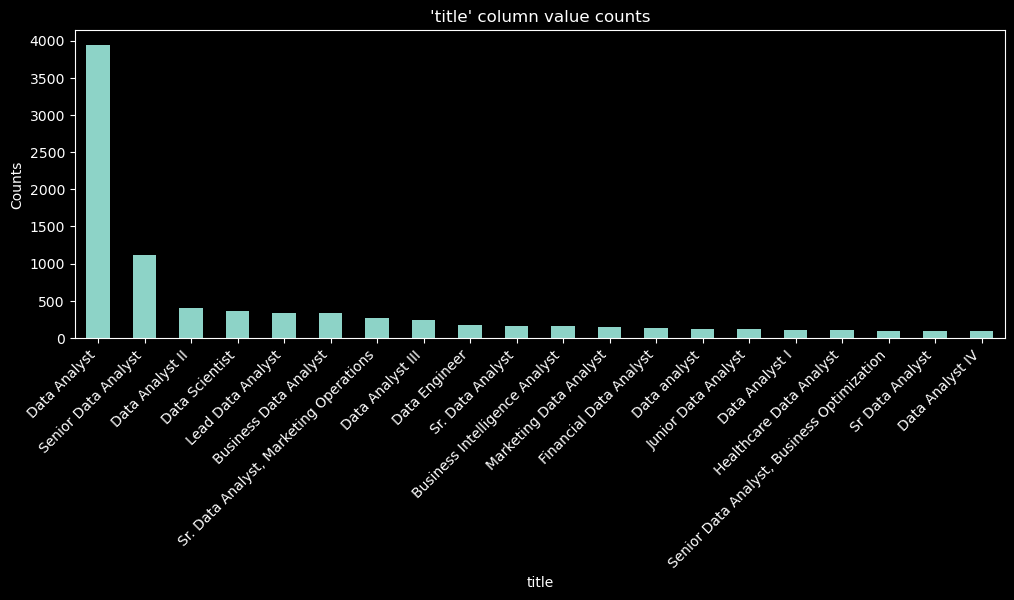

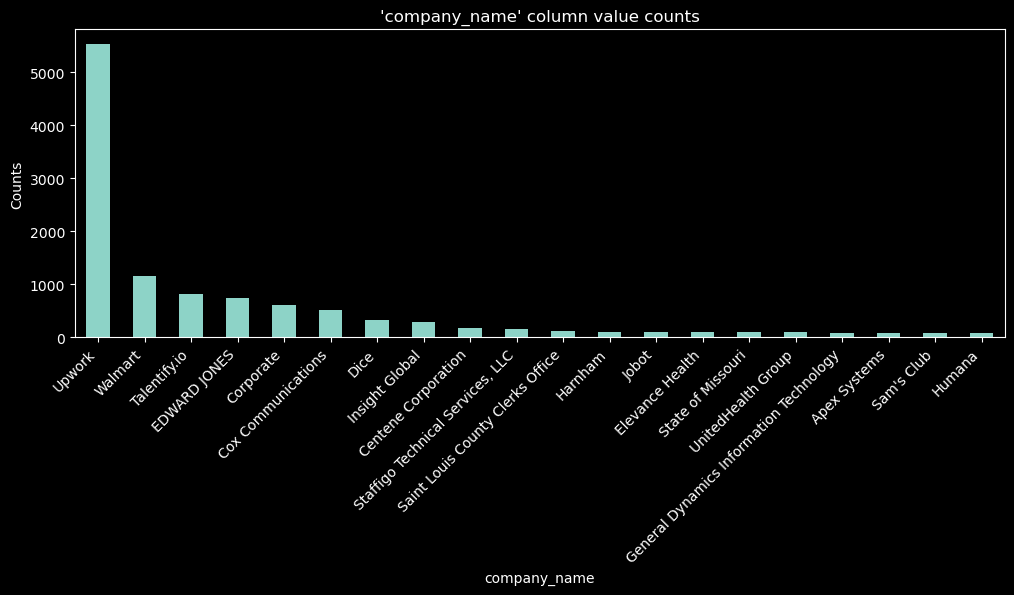

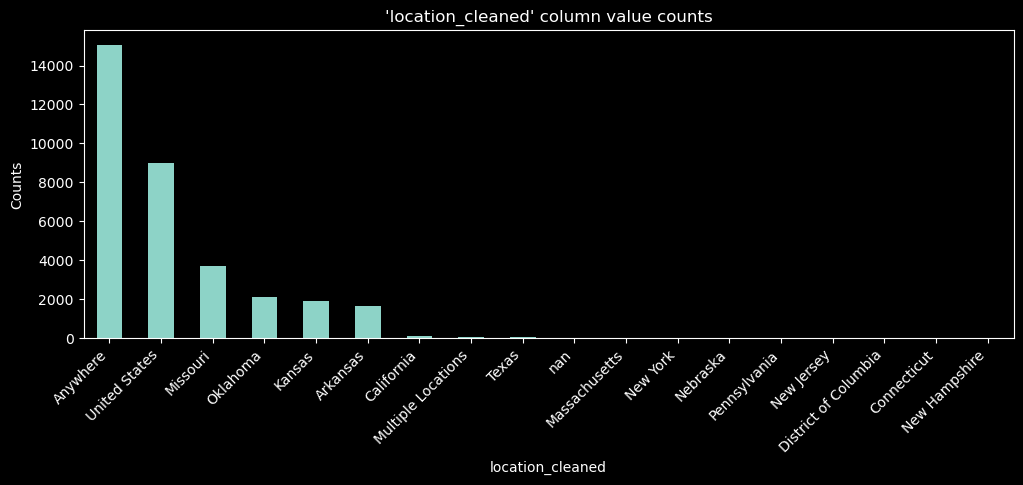

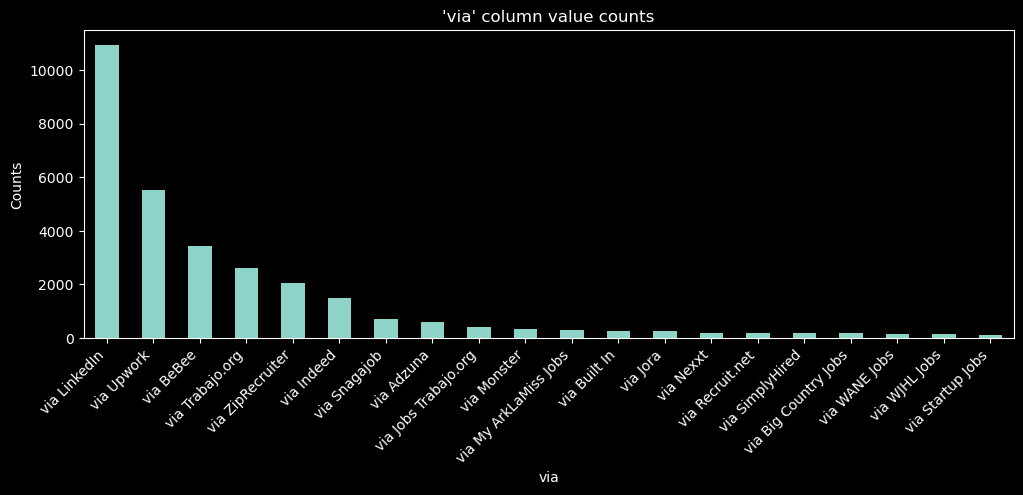

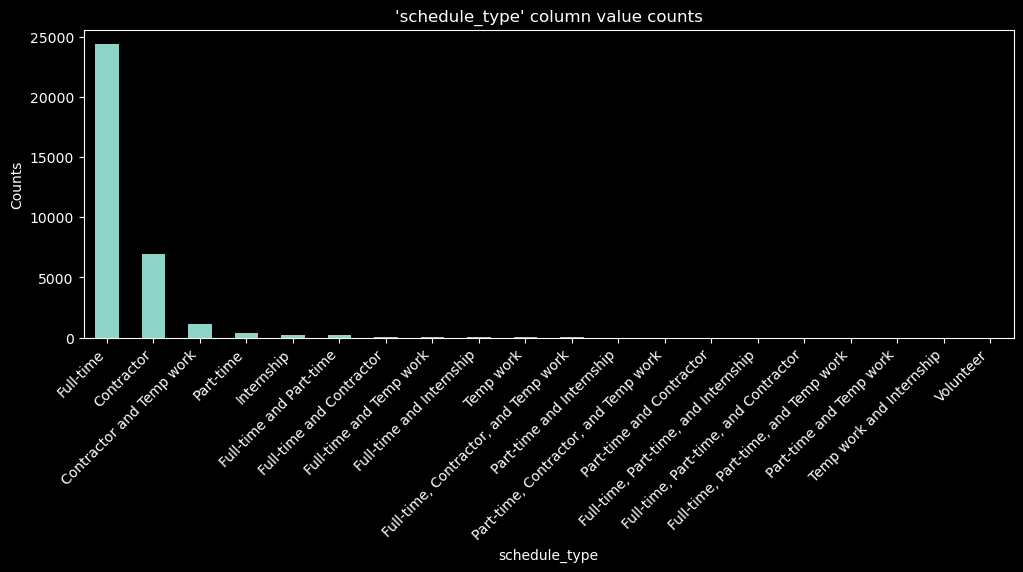

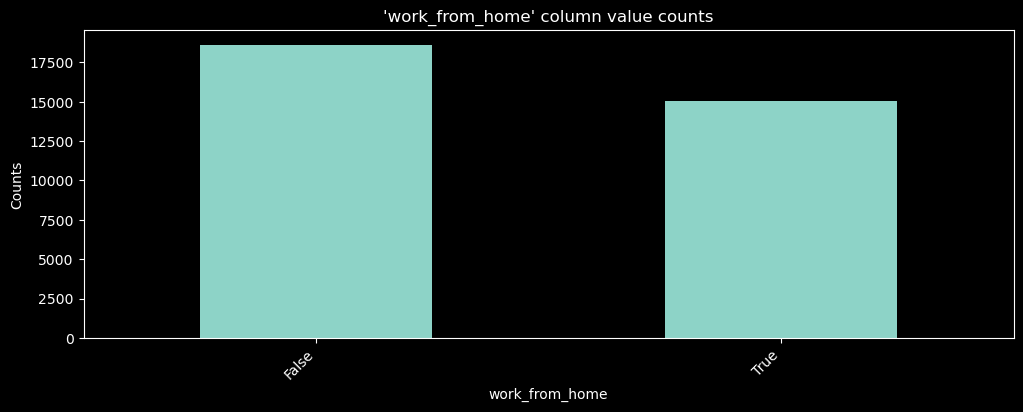

In [512]:
def eda_plot(column, topn=20):
    plt.figure(figsize=(12, 4))
    jobs_df_cleaned[column].value_counts().nlargest(topn).plot(kind="bar")
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation=45, ha="right")
    plt.show()


columns = [
    "title",
    "company_name",
    "location_cleaned",
    "via",
    "schedule_type",
    "work_from_home",
]

for column in columns:
    eda_plot(column)

In [504]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=20):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)

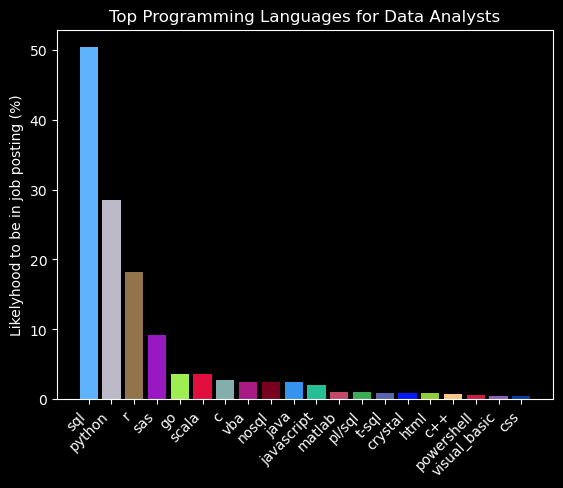

In [505]:
filtered_keywords(jobs_df_cleaned, keywords_programming, title="Top Programming Languages for Data Analysts")

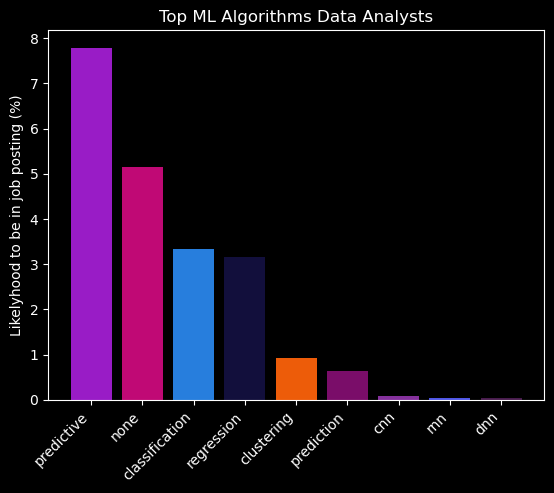

In [506]:
filtered_keywords(jobs_df_cleaned, keywords_ML_Algorithms, title="Top ML Algorithms Data Analysts")

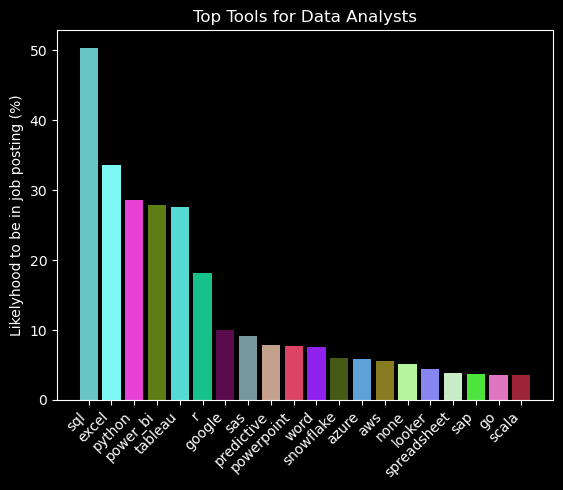

In [507]:
filtered_keywords(jobs_df_cleaned, keywords, title="Top Tools for Data Analysts")

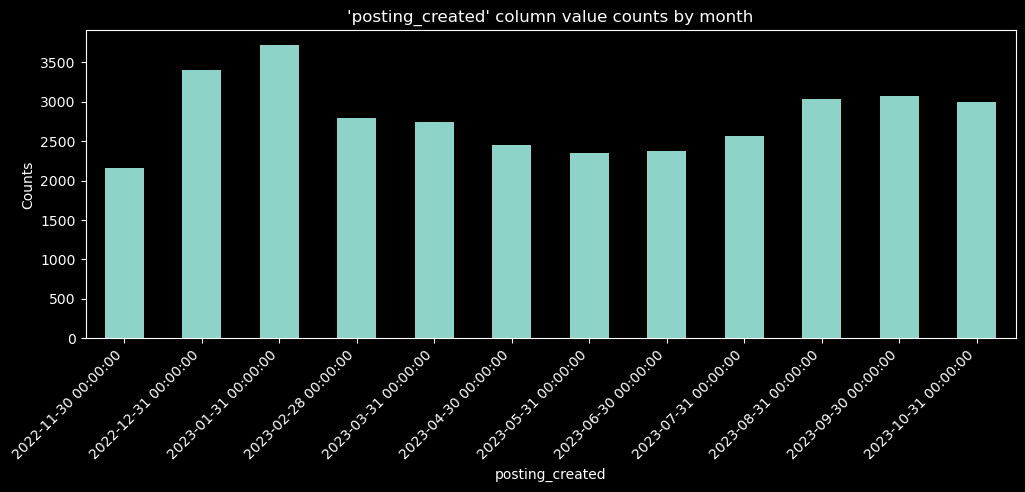

In [525]:
# Resample 'posting_created' to monthly frequency and count the number of postings
monthly_postings = jobs_df_cleaned.resample('M').size()

# Plot the monthly postings
plt.figure(figsize=(12, 4))
monthly_postings.plot(kind="bar")
plt.title("'posting_created' column value counts by month")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

In [532]:
def get_top_skills(df, qty):
    """
    This function takes a DataFrame and a quantity as parameters. 
    It returns a DataFrame with the top skills by number of postings and their average yearly salary. 
    The quantity parameter determines the number of top skills to return.

    Parameters:
    df (DataFrame): The input DataFrame.
    qty (int): The number of top skills to return.

    Returns:
    DataFrame: A DataFrame with the top skills, their number of postings, and their average yearly salary.
    """
    
    # Initialize an empty list to store the skills
    skills = []
    
    # Loop over the values in the 'description_tokens' column and add them to the 'skills' list
    for val in df.description_tokens.values:
        skills.extend(val)
    
    # Get the unique skills and their counts
    skills, counts = np.unique(skills, return_counts=True)
    
    # Get the top skills and their counts
    top_skill_count = sorted(zip(list(skills), list(counts)), key=lambda x: -x[1])[:qty]
    
    # Separate the skills and counts into two lists
    top_skills = list(map(lambda x: x[0], top_skill_count))
    top_counts = list(map(lambda x: x[1], top_skill_count))
    
    # Initialize an empty list to store the average salaries
    salaries = []
    
    # Loop over the top skills and calculate their average salary
    for skill in top_skills: 
        salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].avg_salary.mean())
    
    # Create a DataFrame with the top skills, their number of postings, and their average yearly salary
    top_skills_df = pd.DataFrame({"skill": list(top_skills), "number_of_postings": top_counts,"avg_yearly_salary": list(map(round, salaries))})
    
    # Sort the DataFrame by average yearly salary in descending order
    top_skills_df = top_skills_df.sort_values("avg_yearly_salary", ascending=False)
    
    return top_skills_df

In [535]:
top_skills_df = get_top_skills(jobs_df_cleaned, 100)
top_skills_df

,skill,number_of_postings,avg_yearly_salary
92,c/c++,37,173750
61,c++,257,136896
54,s3,310,134956
55,pyspark,303,132791
71,splunk,136,131683
90,bitbucket,38,130800
66,docker,193,126619
78,perl,81,126084
50,airflow,327,125113
59,tensorflow,263,124352


In [543]:
import plotly.express as px

fig = px.treemap(top_skills_df, path=['skill'], values='number_of_postings',
                  color='avg_yearly_salary', color_continuous_scale='Blues')

fig.update_traces(hovertemplate='Skill: %{label} <br> \
Postings: %{value} <br> Average Annual salary: %{color}<extra></extra>')

fig.update_layout(
    title_text="<b style='font-size: 30px;'>Data Analytics Skills</b><br><i style='font-size: 20px;'>Salaries and Popularity</i>", 
    title_x=0.1, font_color="white",
    paper_bgcolor="#444444", 
    coloraxis_colorbar=dict(title="Average Annual Salary")
)

fig.show()